In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns



In [ ]:

File = '/content/data-economy-index_2021-09-23_2024-04-07 (1).csv'
# Read the CSV file into a pandas DataFrame
data = pd.read_csv(File)
# Print the first few rows of the DataFrame
print(data.head())

        Start         End       Open       High        Low      Close  Volume  \
0  06/04/2024  07/04/2024  12.171809  12.171809  12.171809  12.171809     0.0   
1  05/04/2024  06/04/2024  12.171809  12.171809  12.171809  12.171809     0.0   
2  04/04/2024  05/04/2024  12.171809  12.171809  12.171809  12.171809     0.0   
3  03/04/2024  04/04/2024  12.171809  12.171809  12.171809  12.171809     0.0   
4  02/04/2024  03/04/2024  12.171809  12.171809  12.171809  12.171809     0.0   

   Market Cap  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [ ]:
# Print the number of missing values
print(data.isnull().sum())

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [ ]:
# Print the number of duplicated rows
print(data.duplicated().sum())

0


In [ ]:
# Print the data types of each column
print(data.dtypes)


Start          object
End            object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object


In [ ]:
# Convert columns 'Start' and 'End' to datetime data type with specified format
data['Start'] = pd.to_datetime(data['Start'], format='%d/%m/%Y')
data['End'] = pd.to_datetime(data['End'], format='%d/%m/%Y')


In [ ]:
# Print the data types of each column
print(data.dtypes)

Start         datetime64[ns]
End           datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object


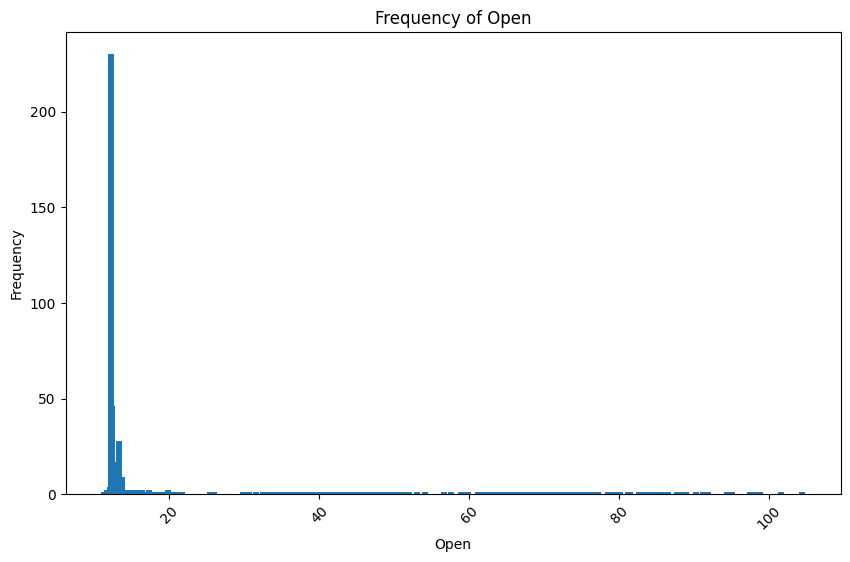

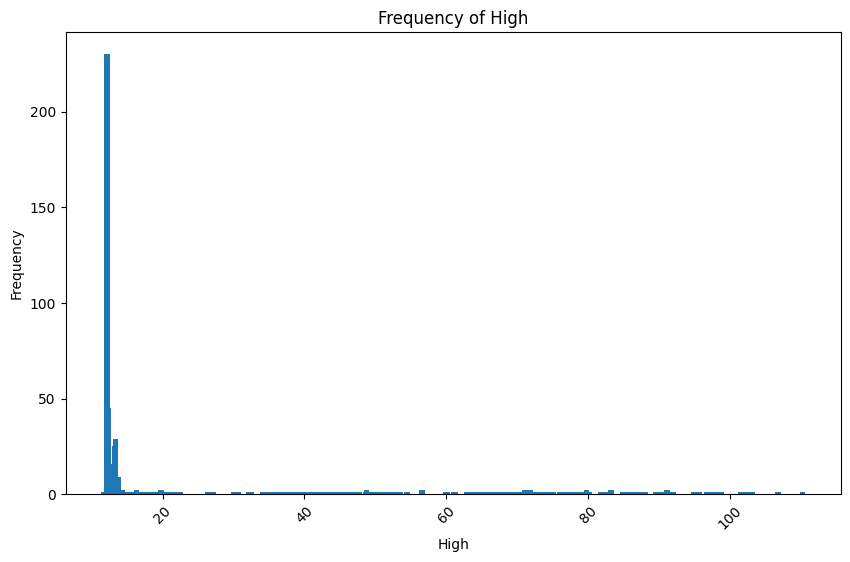

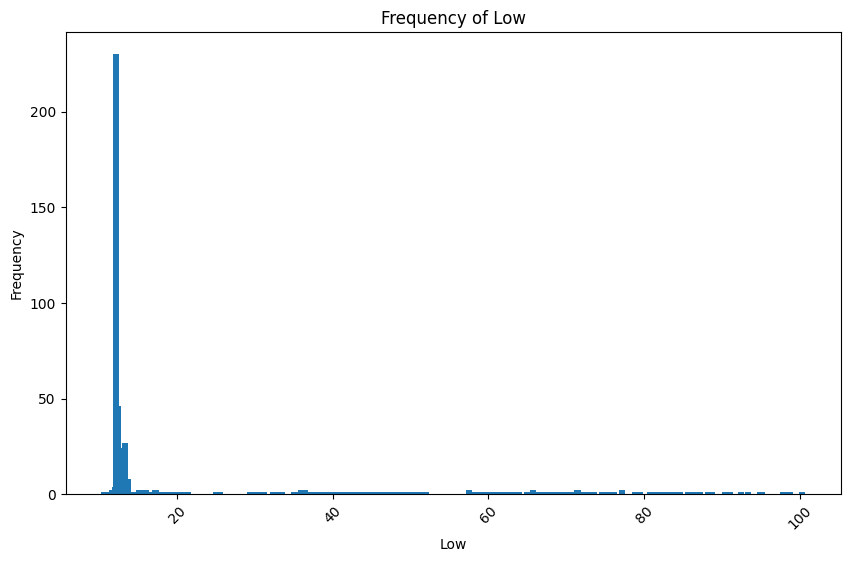

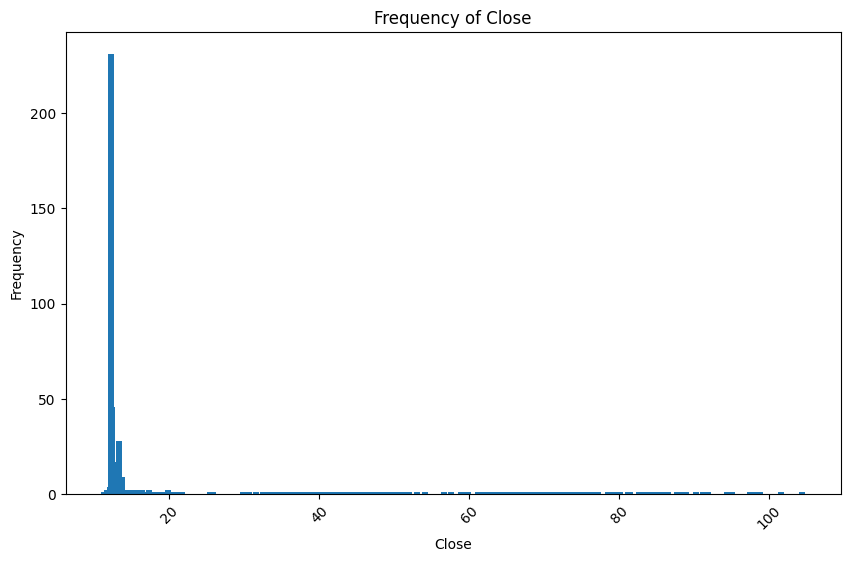

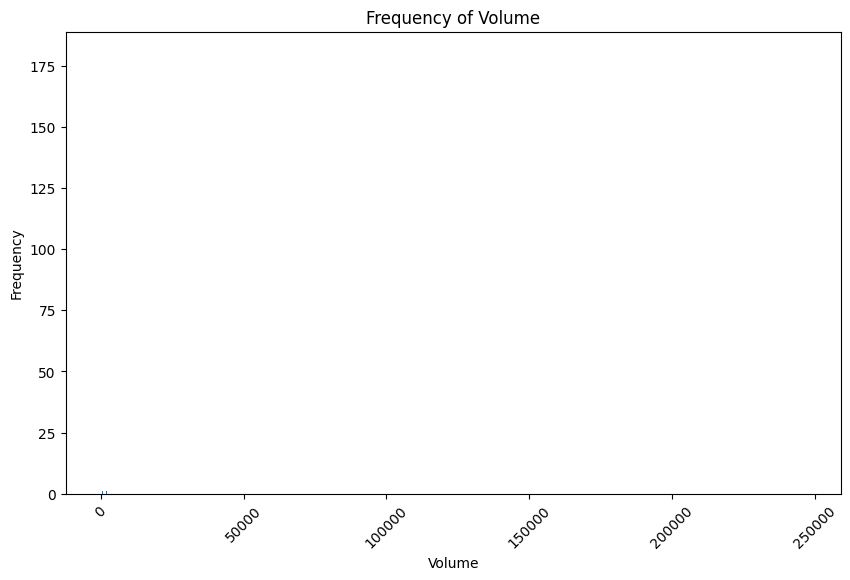

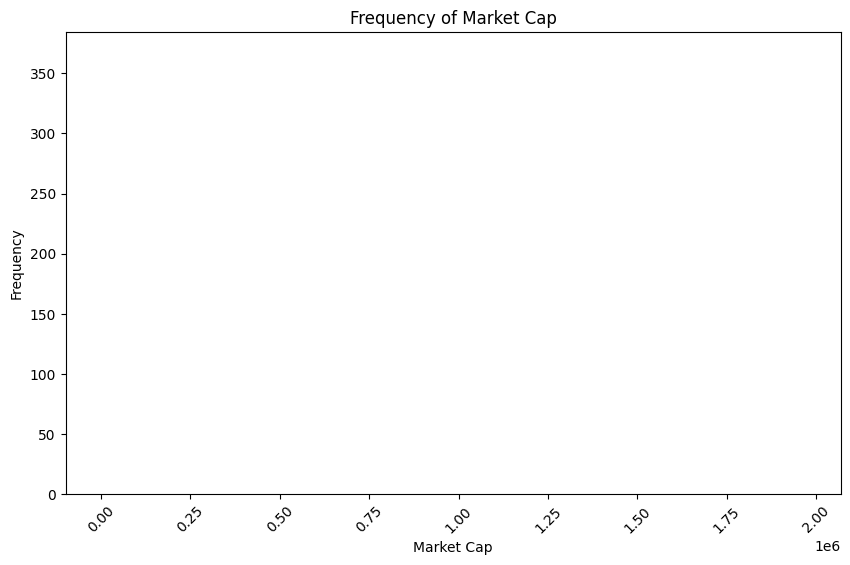

In [ ]:
for col in data.columns[2:]:
        # Calculate value counts for the column
        value_counts = data[col].value_counts()

        # Plot the value counts
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)

        # Set plot title and labels
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)

        # Show plot
        plt.show()



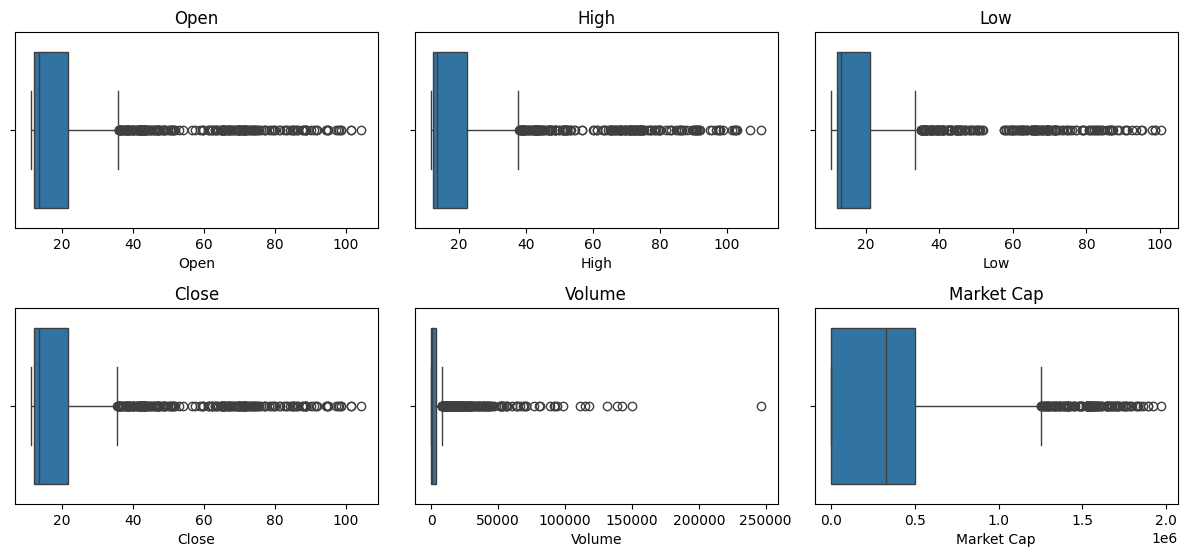

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Iterate over each column and create a box plot
for i, column in enumerate(data.columns[2:]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()



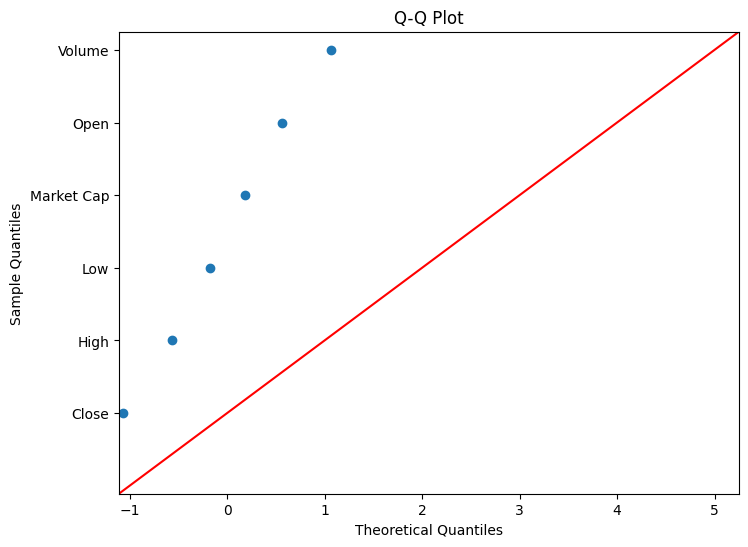

In [ ]:
# Generate Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(data.columns[2:], line='45', ax=ax)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
from scipy.stats import kstest

# Create empty lists to store test statistics and p-values for each column
ks_test_stats = []
ks_p_values = []

# Loop through each column (starting from the third column) in the DataFrame
for col in data.columns[2:]:
    # Perform Kolmogorov-Smirnov test on the current column
    ks_test_stat, ks_p_value = kstest(data[col], 'norm')

    # Append test statistics and p-values to the lists
    ks_test_stats.append(ks_test_stat)
    ks_p_values.append(ks_p_value)

# Print the test statistics and p-values for each column
for col, ks_test_stat, ks_p_value in zip(data.columns[2:], ks_test_stats, ks_p_values):
    print(f"Column: {col}")
    print(f"Kolmogorov-Smirnov test statistic: {ks_test_stat}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p_value}")
    print()



Column: Open
Kolmogorov-Smirnov test statistic: 1.0
Kolmogorov-Smirnov test p-value: 0.0

Column: High
Kolmogorov-Smirnov test statistic: 1.0
Kolmogorov-Smirnov test p-value: 0.0

Column: Low
Kolmogorov-Smirnov test statistic: 1.0
Kolmogorov-Smirnov test p-value: 0.0

Column: Close
Kolmogorov-Smirnov test statistic: 1.0
Kolmogorov-Smirnov test p-value: 0.0

Column: Volume
Kolmogorov-Smirnov test statistic: 0.8058252427178747
Kolmogorov-Smirnov test p-value: 0.0

Column: Market Cap
Kolmogorov-Smirnov test statistic: 0.6051779935275081
Kolmogorov-Smirnov test p-value: 0.0



Spearman Correlation Coefficients:
               Start       End      Open      High       Low     Close  \
Start       1.000000  1.000000 -0.932798 -0.951805 -0.899087 -0.932627   
End         1.000000  1.000000 -0.932798 -0.951805 -0.899087 -0.932627   
Open       -0.932798 -0.932798  1.000000  0.983304  0.974613  0.975235   
High       -0.951805 -0.951805  0.983304  1.000000  0.954920  0.985496   
Low        -0.899087 -0.899087  0.974613  0.954920  1.000000  0.975554   
Close      -0.932627 -0.932627  0.975235  0.985496  0.975554  1.000000   
Volume     -0.819810 -0.819810  0.817867  0.842390  0.779975  0.819281   
Market Cap -0.908694 -0.908694  0.894315  0.909986  0.867762  0.894520   

              Volume  Market Cap  
Start      -0.819810   -0.908694  
End        -0.819810   -0.908694  
Open        0.817867    0.894315  
High        0.842390    0.909986  
Low         0.779975    0.867762  
Close       0.819281    0.894520  
Volume      1.000000    0.741114  
Market Cap  0.7411

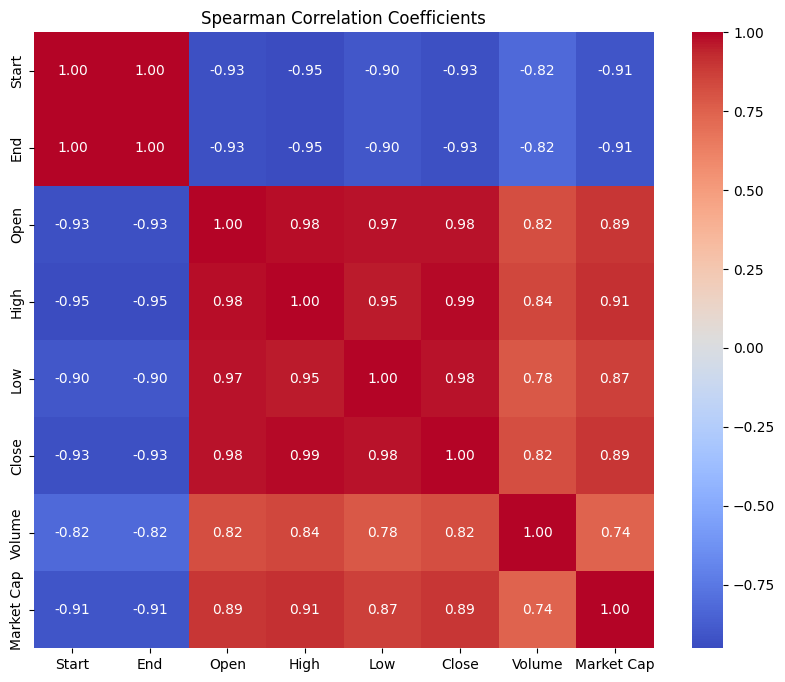

In [ ]:
# Compute Spearman correlation coefficients
spearman_corr = data.corr(method='spearman')

# Print correlation matrix
print("Spearman Correlation Coefficients:")
print(spearman_corr)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Coefficients")
plt.show()


Kendall's Tau Correlation Coefficients:
               Start       End      Open      High       Low     Close  \
Start       1.000000  1.000000 -0.793209 -0.819299 -0.750793 -0.793186   
End         1.000000  1.000000 -0.793209 -0.819299 -0.750793 -0.793186   
Open       -0.793209 -0.793209  1.000000  0.948116  0.930294  0.924166   
High       -0.819299 -0.819299  0.948116  1.000000  0.894359  0.946603   
Low        -0.750793 -0.750793  0.930294  0.894359  1.000000  0.935002   
Close      -0.793186 -0.793186  0.924166  0.946603  0.935002  1.000000   
Volume     -0.645685 -0.645685  0.636983  0.661009  0.601567  0.638502   
Market Cap -0.781255 -0.781255  0.813679  0.835916  0.777283  0.813489   

              Volume  Market Cap  
Start      -0.645685   -0.781255  
End        -0.645685   -0.781255  
Open        0.636983    0.813679  
High        0.661009    0.835916  
Low         0.601567    0.777283  
Close       0.638502    0.813489  
Volume      1.000000    0.589258  
Market Cap  0

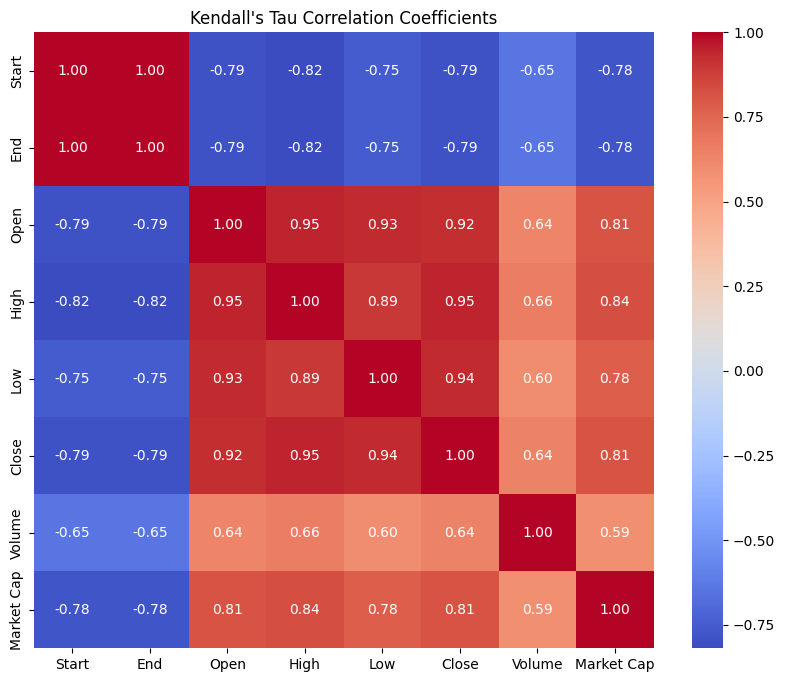

In [ ]:
# Compute Kendall's tau correlation coefficients
kendall_corr = data.corr(method='kendall')

# Print correlation matrix
print("Kendall's Tau Correlation Coefficients:")
print(kendall_corr)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Kendall's Tau Correlation Coefficients")
plt.show()


In [ ]:

from scipy.stats import spearmanr

# Initialize an empty DataFrame to store p-values
spearman_p_values = pd.DataFrame(index=data.columns, columns=data.columns)

# Compute p-values and update the DataFrame
for i, column1 in enumerate(data.columns[2:]):
    for j, column2 in enumerate(data.columns[2:]):
        spearman_corr_val, spearman_p_val = spearmanr(data[column1], data[column2])
        spearman_p_values.iloc[i, j] = spearman_p_val

# Print p-values
print("\nSpearman p-values:")
print(spearman_p_values)




Spearman p-values:
           Start  End Open High  Low Close Volume Market Cap
Start        0.0  0.0  0.0  0.0  0.0   0.0    NaN        NaN
End          0.0  0.0  0.0  0.0  0.0   0.0    NaN        NaN
Open         0.0  0.0  0.0  0.0  0.0   0.0    NaN        NaN
High         0.0  0.0  0.0  0.0  0.0   0.0    NaN        NaN
Low          0.0  0.0  0.0  0.0  0.0   0.0    NaN        NaN
Close        0.0  0.0  0.0  0.0  0.0   0.0    NaN        NaN
Volume       NaN  NaN  NaN  NaN  NaN   NaN    NaN        NaN
Market Cap   NaN  NaN  NaN  NaN  NaN   NaN    NaN        NaN


In [ ]:
from scipy.stats import kendalltau

# Initialize an empty DataFrame to store p-values
kendall_p_values = pd.DataFrame(index=data.columns, columns=data.columns)

# Compute p-values and update the DataFrame
for i, column1 in enumerate(data.columns):
    for j, column2 in enumerate(data.columns):
        if data[column1].dtype != 'datetime64[ns]' and data[column2].dtype != 'datetime64[ns]':
            kendall_corr_val, kendall_p_val = kendalltau(data[column1], data[column2])
            kendall_p_values.loc[column1, column2] = kendall_p_val

# Print p-values
print("\nKendall's tau p-values:")
print(kendall_p_values)



Kendall's tau p-values:
           Start  End Open High  Low Close Volume Market Cap
Start        NaN  NaN  NaN  NaN  NaN   NaN    NaN        NaN
End          NaN  NaN  NaN  NaN  NaN   NaN    NaN        NaN
Open         NaN  NaN  0.0  0.0  0.0   0.0    0.0        0.0
High         NaN  NaN  0.0  0.0  0.0   0.0    0.0        0.0
Low          NaN  NaN  0.0  0.0  0.0   0.0    0.0        0.0
Close        NaN  NaN  0.0  0.0  0.0   0.0    0.0        0.0
Volume       NaN  NaN  0.0  0.0  0.0   0.0    0.0        0.0
Market Cap   NaN  NaN  0.0  0.0  0.0   0.0    0.0        0.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold


# Assuming 'X' contains the features and 'y' contains the target variable (Market Cap)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Features
y = data['Market Cap']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Apply Min-Max scaling
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# Apply Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Create and train the linear regression model
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train_scaled, y_train)

# Make predictions using the linear regression model
linear_predictions_1 = linear_model_1.predict(X_test_scaled)

# Create and train the linear regression model
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_standardized, y_train)

# Make predictions using the linear regression model
linear_predictions_2 = linear_model_2.predict(X_test_standardized)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Calculate Mean Squared Error (MSE)
mse_linear_1 = mean_squared_error(y_test, linear_predictions_1)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear_1 = mean_squared_error(y_test, linear_predictions_1, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_linear_1 = mean_absolute_error(y_test, linear_predictions_1)

# Calculate R-squared (R2) score
r2_linear_1 = r2_score(y_test, linear_predictions_1)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_linear_1 = np.mean(np.abs((y_test - linear_predictions_1) / y_test)) * 100

print('Linear_Regression_1 (scaled)')
print()
print(f'MSE: {mse_linear_1}')
print(f'RMSE: {rmse_linear_1}')
print(f'MAE: {mae_linear_1}')
print(f'R2: {r2_linear_1}')
print(f'MAPE: {mape_linear_1}')
print()

# Calculate Mean Squared Error (MSE)
mse_linear_2 = mean_squared_error(y_test, linear_predictions_2)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear_2 = mean_squared_error(y_test, linear_predictions_2, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_linear_2 = mean_absolute_error(y_test, linear_predictions_2)

# Calculate R-squared (R2) score
r2_linear_2 = r2_score(y_test, linear_predictions_2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_linear_2 = np.mean(np.abs((y_test - linear_predictions_2) / y_test)) * 100

print('Linear_Regression_2 (standarized)')
print()
print(f'MSE: {mse_linear_2}')
print(f'RMSE: {rmse_linear_2}')
print(f'MAE: {mae_linear_2}')
print(f'R2: {r2_linear_2}')
print(f'MAPE: {mape_linear_2}')




Linear_Regression_1 (scaled)

MSE: 66503388063.55388
RMSE: 257882.50825434804
MAE: 199593.56799128203
R2: 0.7709741314014016
MAPE: inf

Linear_Regression_2 (standarized)

MSE: 66503388063.55385
RMSE: 257882.50825434798
MAE: 199593.56799128192
R2: 0.7709741314014016
MAPE: inf


In [ ]:
from sklearn.model_selection import cross_val_score

print('Cross Validation')

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(linear_model_1, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print(f"Mean MSE_linear model_1: {mean_mse}")
print(f"Standard Deviation MSE_linear model_1: {std_mse}")
print()


# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(linear_model_2, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print(f"Mean MSE_linear model_2: {mean_mse}")
print(f"Standard Deviation MSE_linear model_2: {std_mse}")


Cross Validation
Mean MSE_linear model_1: 235080209137.57422
Standard Deviation MSE_linear model_1: 382421416833.19995

Mean MSE_linear model_2: 235080209137.57422
Standard Deviation MSE_linear model_2: 382421416833.19995


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Create and train the Ridge regression model
ridge_model_1 = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model_1.fit(X_train_scaled, y_train)

# Make predictions using the Ridge regression model
ridge_predictions_1 = ridge_model_1.predict(X_test_scaled)

# Create and train the Ridge regression model
ridge_model_2 = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model_2.fit(X_train_standardized, y_train)

# Make predictions using the Ridge regression model
ridge_predictions_2 = ridge_model_2.predict(X_test_standardized)

# Create and train the Lasso regression model
lasso_model_1 = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model_1.fit(X_train_scaled, y_train)

# Make predictions using the Lasso regression model
lasso_predictions_1= lasso_model_1.predict(X_test_scaled)

# Create and train the Lasso regression model
lasso_model_2 = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model_2.fit(X_train_standardized, y_train)

# Make predictions using the Lasso regression model
lasso_predictions_2= lasso_model_2.predict(X_test_standardized)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.095e+13, tolerance: 2.175e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+13, tolerance: 2.175e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculate Mean Squared Error (MSE)
mse_ridge_1 = mean_squared_error(y_test, ridge_predictions_1)

# Calculate Root Mean Squared Error (RMSE)
rmse_ridge_1 = mean_squared_error(y_test, ridge_predictions_1, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_ridge_1 = mean_absolute_error(y_test, ridge_predictions_1)

# Calculate R-squared (R2) score
r2_ridge_1 = r2_score(y_test, ridge_predictions_1)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_ridge_1 = np.mean(np.abs((y_test - ridge_predictions_1) / y_test)) * 100

print('ridge_predictions_1 (scaled)')
print()
print(f'MSE: {mse_ridge_1}')
print(f'RMSE: {rmse_ridge_1}')
print(f'MAE: {mae_ridge_1}')
print(f'R2: {r2_ridge_1}')
print(f'MAPE: {mape_ridge_1}')
print()

# Calculate Mean Squared Error (MSE)
mse_ridge_2 = mean_squared_error(y_test, ridge_predictions_2)

# Calculate Root Mean Squared Error (RMSE)
rmse_ridge_2 = mean_squared_error(y_test, ridge_predictions_2, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_ridge_2 = mean_absolute_error(y_test, ridge_predictions_2)

# Calculate R-squared (R2) score
r2_ridge_2= r2_score(y_test, ridge_predictions_2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_ridge_2 = np.mean(np.abs((y_test - ridge_predictions_2) / y_test)) * 100

print('ridge_predictions_2 (standarized)')
print()
print(f'MSE: {mse_ridge_2}')
print(f'RMSE: {rmse_ridge_2}')
print(f'MAE: {mae_ridge_2}')
print(f'R2: {r2_ridge_2}')
print(f'MAPE: {mape_ridge_2}')



ridge_predictions_1 (scaled)

MSE: 69937780554.28908
RMSE: 264457.52126625
MAE: 214220.29004387476
R2: 0.7591466930376981
MAPE: inf

ridge_predictions_2 (standarized)

MSE: 66987449571.69391
RMSE: 258819.33770816645
MAE: 205092.4067609637
R2: 0.7693071094558284
MAPE: inf


In [ ]:
print('Cross Validation')

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(ridge_model_1, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print(f"Mean MSE_ridge_model_1: {mean_mse}")
print(f"Standard Deviation MSE_ridge_model_1: {std_mse}")
print()


# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(ridge_model_2, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print(f"Mean MSE_ridge_model_2: {mean_mse}")
print(f"Standard Deviation MSE_ridge_model_2: {std_mse}")

Cross Validation
Mean MSE_ridge_model_1: 234989475306.78848
Standard Deviation MSE_ridge_model_1: 382230577164.0236

Mean MSE_ridge_model_2: 234989475306.78848
Standard Deviation MSE_ridge_model_2: 382230577164.0236


In [ ]:
# Calculate Mean Squared Error (MSE)
mse_lasso_1 = mean_squared_error(y_test, lasso_predictions_1)

# Calculate Root Mean Squared Error (RMSE)
rmse_lasso_1 = mean_squared_error(y_test, lasso_predictions_1, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_lasso_1 = mean_absolute_error(y_test, lasso_predictions_1)

# Calculate R-squared (R2) score
r2_lasso_1 = r2_score(y_test, lasso_predictions_1)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_lasso_1 = np.mean(np.abs((y_test - lasso_predictions_1) / y_test)) * 100

print('lasso_predictions_1 (scaled)')
print()
print(f'MSE: {mse_lasso_1}')
print(f'RMSE: {rmse_lasso_1}')
print(f'MAE: {mae_lasso_1}')
print(f'R2: {r2_lasso_1}')
print(f'MAPE: {mape_lasso_1}')
print()

# Calculate Mean Squared Error (MSE)
mse_lasso_2 = mean_squared_error(y_test, lasso_predictions_2)

# Calculate Root Mean Squared Error (RMSE)
rmse_lasso_2 = mean_squared_error(y_test, lasso_predictions_2, squared=False)

# Calculate Mean Absolute Error (MAE)
mae_lasso_2 = mean_absolute_error(y_test, lasso_predictions_2)

# Calculate R-squared (R2) score
r2_lasso_2 = r2_score(y_test, lasso_predictions_2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_lasso_2 = np.mean(np.abs((y_test - lasso_predictions_2) / y_test)) * 100

print('lasso_predictions_2 (standarized)')
print()
print(f'MSE: {mse_lasso_2}')
print(f'RMSE: {rmse_lasso_2}')
print(f'MAE: {mae_lasso_2}')
print(f'R2: {r2_lasso_2}')
print(f'MAPE: {mape_lasso_2}')


lasso_predictions_1 (scaled)

MSE: 66518996255.72441
RMSE: 257912.7686946197
MAE: 199965.27553785738
R2: 0.7709203795569738
MAPE: inf

lasso_predictions_2 (standarized)

MSE: 66515754237.94017
RMSE: 257906.48351280385
MAE: 199957.5535524047
R2: 0.7709315444909819
MAPE: inf


In [ ]:
print('Cross Validation')

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(lasso_model_1, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print(f"Mean MSE_lasso_model_1: {mean_mse}")
print(f"Standard Deviation MSE_lasso_model_1: {std_mse}")
print()


# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(lasso_model_2, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print(f"Mean MSE_lasso_model_2: {mean_mse}")
print(f"Standard Deviation MSE_lasso_model_2: {std_mse}")

Cross Validation
Mean MSE_lasso_model_1: 236407105046.583
Standard Deviation MSE_lasso_model_1: 384507287890.1918

Mean MSE_lasso_model_2: 236407105046.583
Standard Deviation MSE_lasso_model_2: 384507287890.1918


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.465e+13, tolerance: 2.233e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.457e+13, tolerance: 2.275e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+13, tolerance: 2.682e

Arima Model

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.4 MB/s eta 0:00:00


In [ ]:
# Convert date columns to datetime objects
data['converted_start'] = pd.to_numeric(data['Start'])
data['converted_end'] = pd.to_numeric(data['End'])




In [ ]:
from pmdarima.arima import auto_arima

# Select relevant columns for ARIMA modeling
arima_data = data[['converted_start', 'converted_end', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Perform auto ARIMA
arima_model = auto_arima(data['Market Cap'], start_p=1, d=None, start_q=1,
                         max_p=3, max_q=3, seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22587.227, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22586.330, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22587.845, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22587.909, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22584.330, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.508 seconds


In [ ]:
(p,d,q) = (0,1,0)

from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
arima_model = ARIMA(y_train, exog=X_train, order=(p, d, q))
arima_model_fit = arima_model.fit()


# Make predictions using the ARIMA model with exogenous variables for the test period
arima_predictions = arima_model_fit.forecast(steps=len(X_test), exog=X_test)




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae_arima = mean_absolute_error(y_test, arima_predictions)

# Calculate MSE
mse_arima= mean_squared_error(y_test, arima_predictions)

# Calculate RMSE
rmse_arima = np.sqrt(mse_arima)

# Calculate R-squared (R2) score
r2_arima = r2_score(y_test, arima_predictions)

print('Arima')
print(f'MAE: {mae_arima}')
print(f'MSE: {mse_arima}')
print(f'RMSE: {rmse_arima}')
print(f'R2: {r2_arima}')



Arima
MAE: 205314.97500332372
MSE: 89025904885.61975
RMSE: 298372.09133164544
R2: 0.6934105797027916


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mae_best_rf = mean_absolute_error(y_test, best_rf_predictions)
mse_best_rf = mean_squared_error(y_test, best_rf_predictions)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, best_rf_predictions)

# Print the evaluation metrics
print("\nRandom Forest Regression Metrics with Best Parameters:")
print(f"Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf}")
print(f"R-squared (R2): {r2_best_rf}")


Best Parameters: {'max_depth': 5, 'n_estimators': 100}

Random Forest Regression Metrics with Best Parameters:
Mean Absolute Error (MAE): 78183.69372771199
Mean Squared Error (MSE): 35434839881.36552
Root Mean Squared Error (RMSE): 188241.44039335632
R-squared (R2): 0.8779686987567245


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation on the best estimator
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (MSE is negated by default)
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = cv_scores_positive.mean()
std_mse = cv_scores_positive.std()

print("Cross-Validation Mean MSE:", mean_mse)
print("Cross-Validation Standard Deviation MSE:", std_mse)



Cross-Validation Mean MSE: 56928303696.08218
Cross-Validation Standard Deviation MSE: 54261028874.62831


LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Reshape the input data
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=(1, X_train_scaled.shape[1])))
    model.add(Dense(1))
    return model

# Compile the model
lstm_model = create_lstm_model()
lstm_model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the LSTM model
lstm_model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=50, batch_size=32)

# Evaluate the model on the test set
loss = lstm_model.evaluate(X_test_reshaped, y_test)
print("Test Loss_scaled:", loss)


Epoch 1/50
24/24 [==============================] - 3s 41ms/step - loss: 509638606848.0000 - val_loss: 469066481664.0000
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 509638377472.0000 - val_loss: 469066186752.0000
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 509638115328.0000 - val_loss: 469065924608.0000
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 509637722112.0000 - val_loss: 469065465856.0000
Epoch 5/50
24/24 [==============================] - 0s 8ms/step - loss: 509637165056.0000 - val_loss: 469064876032.0000
Epoch 6/50
24/24 [==============================] - 0s 6ms/step - loss: 509636411392.0000 - val_loss: 469064155136.0000
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 509635526656.0000 - val_loss: 469063303168.0000
Epoch 8/50
24/24 [==============================] - 0s 10ms/step - loss: 509634576384.0000 - val_loss: 469062320128.0000
Epoch 9/50
24/24 [====================

In [ ]:

from math import sqrt
from sklearn.model_selection import TimeSeriesSplit

# Define evaluation metrics functions
def calculate_evaluation_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2



# Reshape X_test_scaled
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Make predictions
y_pred = lstm_model.predict(X_test_scaled_reshaped)


# Calculate evaluation metrics
mse_lstm_1, rmse_lstm_1, mae_lstm_1, r2_lstm_1 = calculate_evaluation_metrics(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for LSTM Model:")
print(f"MSE: {mse_lstm_1}")
print(f"RMSE: {rmse_lstm_1}")
print(f"MAE: {mae_lstm_1}")
print(f"R2 Score: {r2_lstm_1}")






6/6 [==============================] - 1s 2ms/step
Evaluation Metrics for LSTM Model:
MSE: 469014757205.7554
RMSE: 684846.520912354
MAE: 422708.97115882556
R2 Score: -0.6152036051449956


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Reshape the input data
X_train_reshaped_2 = X_train_standardized.reshape((X_train_standardized.shape[0], 1, X_train_standardized.shape[1]))
X_test_reshaped_2 = X_test_standardized.reshape((X_test_standardized.shape[0], 1, X_test_standardized.shape[1]))

# Define the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=(1, X_train_standardized.shape[1])))
    model.add(Dense(1))
    return model

# Compile the model
lstm_model_2 = create_lstm_model()
lstm_model_2.compile(loss='mean_squared_error', optimizer=Adam())

# Train the LSTM model
lstm_model_2.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=50, batch_size=32)

# Evaluate the model on the test set
loss = lstm_model_2.evaluate(X_test_reshaped, y_test)
print("Test Loss_standardized:", loss)

Epoch 1/50
24/24 [==============================] - 3s 33ms/step - loss: 509638672384.0000 - val_loss: 469066514432.0000
Epoch 2/50
24/24 [==============================] - 0s 9ms/step - loss: 509638443008.0000 - val_loss: 469066350592.0000
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 509638246400.0000 - val_loss: 469066022912.0000
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 509637853184.0000 - val_loss: 469065662464.0000
Epoch 5/50
24/24 [==============================] - 0s 7ms/step - loss: 509637361664.0000 - val_loss: 469065105408.0000
Epoch 6/50
24/24 [==============================] - 0s 8ms/step - loss: 509636673536.0000 - val_loss: 469064384512.0000
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 509635887104.0000 - val_loss: 469063630848.0000
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 509634904064.0000 - val_loss: 469062647808.0000
Epoch 9/50
24/24 [=====================

In [ ]:


# Define evaluation metrics functions
def calculate_evaluation_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2



# Reshape X_test_scaled
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Make predictions
y_pred = lstm_model.predict(X_test_scaled_reshaped)


# Calculate evaluation metrics
mse_lstm_2, rmse_lstm_2, mae_lstm_2, r2_lstm_2 = calculate_evaluation_metrics(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for LSTM Model 2:")
print(f"MSE: {mse_lstm_2}")
print(f"RMSE: {rmse_lstm_2}")
print(f"MAE: {mae_lstm_2}")
print(f"R2 Score: {r2_lstm_2}")

6/6 [==============================] - 0s 2ms/step
Evaluation Metrics for LSTM Model 2:
MSE: 469014757205.7554
RMSE: 684846.520912354
MAE: 422708.97115882556
R2 Score: -0.6152036051449956


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Initialize the DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Decision Tree Model:")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"MAE: {mae_dt}")
print(f"R2 Score: {r2_dt}")



Evaluation Metrics for Decision Tree Model:
MSE: 39191740656.84383
RMSE: 197969.0396421719
MAE: 57802.82852266736
R2 Score: 0.865030599083962


In [ ]:
import plotly.graph_objs as go

# Sample data (replace these with your actual data)
model_names = ['linear regression(scaled data)','linear regression(standarised data)',
               'ridge regression(scaled data)','ridge regression(standarised data)',
               'lasso regression(scaled data)','lasso regression(standarised data)',
               'Arima','Random Forest',
               'LSTM(scaled data)','LSTM(standarised data)',
               'Decision tree']
metric_names = ['MSE', 'RMSE', 'MAE', 'R2 Score']
metric_values = {
    'linear regression(scaled data)': [mse_linear_1, rmse_linear_1, mae_linear_1, r2_linear_1],
    'linear regression(standarised data)': [mse_linear_2, rmse_linear_2, mae_linear_2, r2_linear_2],
    'ridge regression(scaled data)': [mse_ridge_1, rmse_ridge_1, mae_ridge_1, r2_ridge_1],
    'ridge regression(standarised data)': [mse_ridge_2, rmse_ridge_2, mae_ridge_2, r2_ridge_2],
    'lasso regression(scaled data)': [mse_lasso_1, rmse_lasso_1, mae_lasso_1, r2_lasso_1],
    'lasso regression(standarised data)': [mse_lasso_2, rmse_lasso_2, mae_lasso_2, r2_lasso_2],
    'Arima': [mse_arima, rmse_arima, mae_arima, r2_arima],
    'Random Forest': [mse_best_rf, rmse_best_rf, mae_best_rf, r2_best_rf],
    'LSTM(scaled data)': [mse_lstm_1, rmse_lstm_1, mae_lstm_1, r2_lstm_1],
    'LSTM(standarised data)': [mse_lstm_2, rmse_lstm_2, mae_lstm_2, r2_lstm_2],
    'Decision tree': [mse_dt, rmse_dt, mae_dt, r2_dt]
}

# Create traces for each metric
data = []
for i, metric_name in enumerate(metric_names):
    values = [metric_values[model][i] for model in model_names]
    trace = go.Bar(
        x=model_names,
        y=values,
        name=metric_name
    )
    data.append(trace)

# Create layout
layout = go.Layout(
    title='Comparison of Evaluation Metrics for Different Models',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Metric Value'),
    barmode='group'
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()
